In [18]:
# -*- coding: UTF-8 -*-

#Team Members:
#Yifu Liu
#Chen Liu

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [19]:
# calculate the euclidean distance between vec1 and vec2 
def calcuDistance(vec1, vec2):
    return np.sqrt(np.sum(np.square(vec1 - vec2)))

In [20]:
# Initialize k Centroids as mean vector ramdomly 
def initCentroids(dataSet, k):
    return random.sample(dataSet, k)  

In [21]:
# classify all the item by flag
def classifybyflag(dataSet, centroidList):
    clusterDict = dict()  
    for item in dataSet:
        vec1 = np.array(item)  
        # Define "Flag" to note down the closest cluster for each item 
        flag = 0  
        minDis = float("inf")  
        for i in range(len(centroidList)):# For each item, calculate the euclidean distance between item and all k Centroids
            vec2 = np.array(centroidList[i])
            distance = calcuDistance(vec1, vec2)  
            # "Flag" will save as the closest cluster for current item
            if distance < minDis:
                minDis = distance
                flag = i  
        if flag not in clusterDict.keys():  # Initiate the flag if it doesn't exist
            clusterDict[flag] = list()
            print (flag, item)
        # Find the smallest one and add it into cluster    
        clusterDict[flag].append(item)  
    return clusterDict  

In [22]:
# Find k new Centroids
def findCentroids(clusterDict):
    centroidList = list()
    for key in clusterDict.keys():
        centroid = np.mean(np.array(clusterDict[key]), axis=0)  # Find centroid by calculating the mean vector
        centroidList.append(centroid)
    return np.array(centroidList).tolist()

In [23]:
# Calculate the Mean Square Error for each cluster 
    
def calcuMSE(clusterDict, centroidList):    
    sum = 0.0
    for key in clusterDict.keys(): # Add up the distance between centroid and all the vec
        vec1 = np.array(centroidList[key])
        distance = 0.0
        for item in clusterDict[key]:
            vec2 = np.array(item)
            distance += calcuDistance(vec1, vec2)
        sum += distance
    return sum

In [24]:
# Plot the cluster result for each iteration 
def plotCluster(centroidList, clusterDict):
    colorMark = ['or', 'ob', 'og', 'ok', 'oy', 'oc','om']  
    centroidMark = ['dr', 'db', 'dg', 'dk', 'dy','oc', 'dm']  
    for key in clusterDict.keys():
        plt.plot(centroidList[key][0], centroidList[key][1], centroidMark[key], markersize=20)  # plot centroid 
        for item in clusterDict[key]:
            plt.plot(item[0], item[1], colorMark[key],markersize=2)  # plot all items for each cluster  
    plt.show()

2 [6.575, 24.0]
3 [6.421, 21.6]
0 [5.631, 16.5]
1 [6.377, 15.0]
------------The 1 Iteration--------
K Mean Vector:  [[6.335, 18.1], [6.629, 13.4], [6.565, 24.8], [6.31, 20.7]]
Mean Square Error:  1861.0418615084156


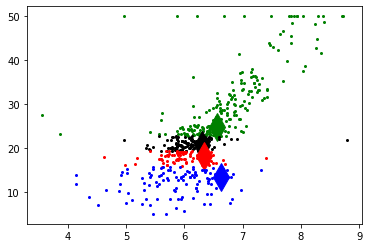

None
1 [6.575, 24.0]
0 [7.185, 34.7]
2 [5.631, 16.5]
3 [5.57, 13.6]
------------The 2 Iteration--------
K Mean Vector:  [[6.7580646766169155, 30.895024875621893], [6.068815126050419, 20.974789915966383], [5.9646233766233765, 17.85324675324675], [5.873293577981649, 12.119266055045872]]
Mean Square Error:  1465.711868252618


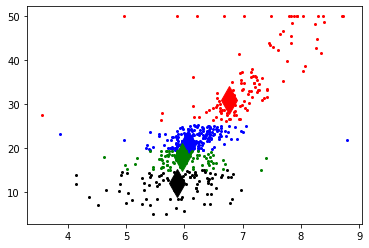

None
0 [6.575, 24.0]
1 [7.185, 34.7]
2 [5.631, 16.5]
3 [5.57, 13.6]
------------The 3 Iteration--------
K Mean Vector:  [[6.169015544041449, 22.243005181347144], [7.062471074380165, 35.50909090909089], [5.960112244897962, 17.560204081632648], [5.8590957446808485, 11.608510638297869]]
Mean Square Error:  1341.0617662869893


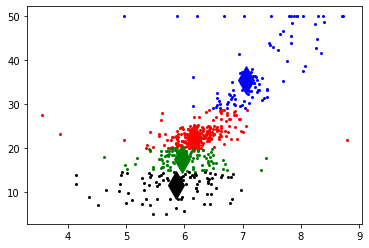

None
0 [6.575, 24.0]
1 [7.185, 34.7]
2 [5.631, 16.5]
3 [5.57, 13.6]
------------The 4 Iteration--------
K Mean Vector:  [[6.228176470588232, 23.145098039215675], [7.229372340425535, 37.801063829787225], [5.972798319327732, 17.727731092436976], [5.833179775280898, 11.428089887640448]]
Mean Square Error:  1330.7302621027711


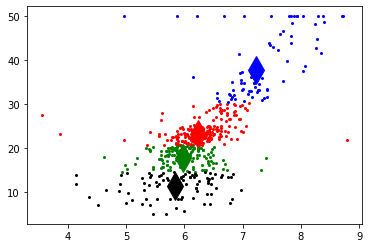

None
0 [6.575, 24.0]
1 [7.185, 34.7]
2 [5.631, 16.5]
3 [5.57, 13.6]
------------The 5 Iteration--------
K Mean Vector:  [[6.291903061224488, 23.943877551020393], [7.3170125000000015, 39.22999999999998], [5.9663661971831, 18.082394366197168], [5.8434886363636345, 11.392045454545453]]
Mean Square Error:  1331.1502015711192


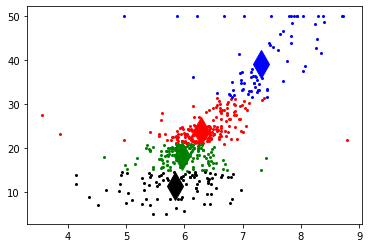

None


In [25]:
# Main function

# Creating dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data'
header_dict = {
    'CRIM': 'per capita crime rate by town', 
    'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft',
    'INDUS': 'proportion of nonretail business acres per town',
    'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)' ,
    'NOX': 'nitric oxides concentration (parts per 10 million)', 
    'RM': 'average number of rooms per dwelling', 
    'AGE': 'proportion of owner-occupied units built prior to 1940' , 
    'DIS': 'weighted distances to five Boston employment centers', 
    'RAD': 'index of accessibility to radial highways' , 
    'TAX': 'full-value property-tax rate per $10,000' , 
    'PTRATIO': 'pupil-teacher ratio by town', 
    'B': '1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town', 
    'LSTAT': 'percent lower status of the population', 
    'MEDV': 'Median value of owner-occupied homes in $1000s'
    }
headers = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
    ] 
df = pd.read_fwf(url, names=headers)
dataSet = np.array(df[['RM', 'MEDV']]).tolist()

# Initialize k Centroids
centroidList = initCentroids(dataSet,4)  

# classify the item by flag
clusterDict = classifybyflag(dataSet, centroidList) 

# Calculate the Mean Square Error  
newMSE = calcuMSE(clusterDict, centroidList)  
oldMSE = -1.0  

print ('------------The 1 Iteration--------')
print ('K Mean Vector: ', centroidList)
print ('Mean Square Error: ', newMSE)

# Plot the cluster result for each iteration 
print (plotCluster(centroidList, clusterDict))  


k = 2

# Once the Difference of Mean Square Error bewteen two iteration <1 , loop end
while abs(newMSE - oldMSE) >= 1:  
    
        # Find new Centroids
        centroidList = findCentroids(clusterDict)
        
        # Find new Cluster
        clusterDict = classifybyflag(dataSet, centroidList)  
        
        # Calculate the Mean Square Error 
        oldMSE = newMSE
        newMSE = calcuMSE(clusterDict, centroidList)
        
        print ('------------The %d Iteration--------' % k)
        print ('K Mean Vector: ', centroidList)
        print ('Mean Square Error: ', newMSE)
        
        # Plot the cluster result for each iteration 
        print (plotCluster(centroidList, clusterDict) ) 
        k += 1